Initial shape: (23171, 20)


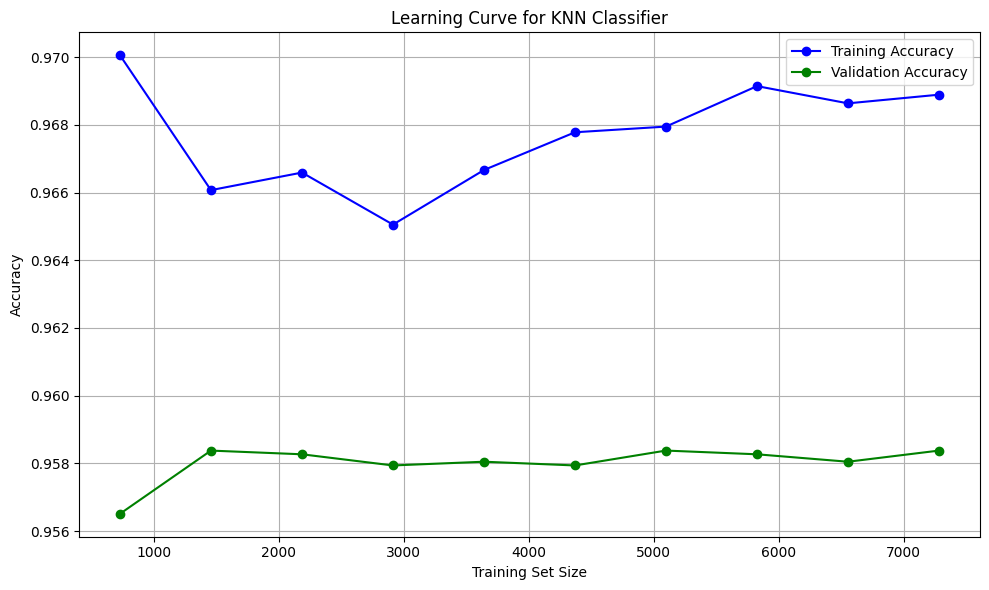

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('/content/Airline_Reviews.csv')
print("Initial shape:", df.shape)

# Clean and encode target
df['Recommended'] = df['Recommended'].astype(str).str.strip().str.lower()
df = df[df['Recommended'].isin(['yes', 'no'])]
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

# Select numeric features
selected_features = [
    'Overall_Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
    'Value For Money'
]

# Drop rows with missing selected features
df = df.dropna(subset=selected_features)

# Prepare features and target
X = df[selected_features]
y = df['Recommended']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Accuracy', color='green')
plt.title('Learning Curve for KNN Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)  # X_scaled is your scaled features


KNeighborsClassifier()

In [5]:
import joblib

joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [6]:
# Load model and scaler
import joblib
knn = joblib.load('knn_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example function to predict
def predict_recommendation(input_data):
    """
    input_data: list of 7 feature values in this order:
    ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service',
     'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
     'Value For Money']
    """
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = knn.predict(input_scaled)
    return 'Yes' if prediction[0] == 1 else 'No'


In [8]:
import numpy as np
import joblib

# Load trained model and scaler
knn = joblib.load('knn_model.pkl')
scaler = joblib.load('scaler.pkl')

# Feature order reminder:
feature_names = [
    'Overall_Rating', 'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
    'Value For Money'
]

# Predict function
def predict_recommendation(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = knn.predict(input_scaled)
    return 'Yes' if prediction[0] == 1 else 'No'


In [11]:
# Manually enter your own inputs
user_input = []

for name in feature_names:
    val = float(input(f"Enter value for '{name}' (1-10): "))
    user_input.append(val)

print("Your Input:", dict(zip(feature_names, user_input)))

result = predict_recommendation(user_input)
print("Recommended?", result)


Enter value for 'Overall_Rating' (1-10): 1
Enter value for 'Seat Comfort' (1-10): 1
Enter value for 'Cabin Staff Service' (1-10): 1
Enter value for 'Food & Beverages' (1-10): 1
Enter value for 'Ground Service' (1-10): 1
Enter value for 'Inflight Entertainment' (1-10): 1
Enter value for 'Value For Money' (1-10): 1
Your Input: {'Overall_Rating': 1.0, 'Seat Comfort': 1.0, 'Cabin Staff Service': 1.0, 'Food & Beverages': 1.0, 'Ground Service': 1.0, 'Inflight Entertainment': 1.0, 'Value For Money': 1.0}
Recommended? No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
# These are the only features you want now
selected_features = [
    'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service',
    'Inflight Entertainment', 'Value For Money'
]


In [16]:
df = df.dropna(subset=selected_features + ['Recommended'])


In [18]:
# Load your original dataset
df = pd.read_csv('/content/Airline_Reviews.csv')

# Only keep rows where all selected features and Recommended are not null
df = df.dropna(subset=[
    'Seat Comfort', 'Cabin Staff Service',
    'Food & Beverages', 'Ground Service',
    'Inflight Entertainment', 'Value For Money',
    'Recommended'
])

# Clean and convert 'Recommended' column to binary
df['Recommended'] = df['Recommended'].map({'Yes': 1, 'No': 0})

# Drop rows where mapping created NaNs (i.e., unexpected values)
df = df.dropna(subset=['Recommended'])

# Feature matrix and target
X = df[selected_features]
y = df['Recommended']


In [ ]:
# Feature names excluding 'Overall_Rating'
feature_names = [
    'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment', 'Value For Money'
]

# Ask user to input values (1-10) for each feature
user_input = []
print("Please enter ratings between 1 and 10 for the following:")

for feature in feature_names:
    while True:
        try:
            value = int(input(f"{feature}: "))
            if 1 <= value <= 10:
                user_input.append(value)
                break
            else:
                print("⚠️ Enter a value between 1 and 10.")
        except ValueError:
            print("⚠️ Invalid input. Please enter an integer.")

# Show the input and predict
print("\nYour Input:", dict(zip(feature_names, user_input)))
result = predict_recommendation(user_input)
print("✅ Recommended?" if result == "Yes" else "❌ Not Recommended")
52
2

Please enter ratings between 1 and 10 for the following:
